## Table of Content
   
## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


This report presents an unsupervised topic modelling analysis of customer reviews from Airbnb listings, with the goal of identifying frequently discussed themes and providing data-driven recommendations to enhance business performance. Using Latent Dirichlet Allocation (LDA), we processed and analyzed textual feedback to extract six dominant topics across thousands of guest reviews.

To ensure clarity and focus, text data was preprocessed by removing irrelevant elements such as punctuation and stopwords, and only meaningful words were retained for analysis. Due to the execution environment limitations, part-of-speech tagging was omitted; however, the results still provide strong insights into guest priorities and pain points.

The model revealed recurring topics that centered around comfort and sleep quality, host communication, cleanliness of the bathroom, property location, kitchen amenities, and price-related perceptions. These topics were consistent with known factors that influence customer satisfaction in the accommodation industry.

The results highlight specific areas for improvement:

* Enhancing bedding and sleep comfort

* Improving host responsiveness and guest onboarding

* Maintaining high standards of cleanliness

* Providing accurate descriptions of property location

* Upgrading essential amenities (e.g., kitchen, bathrooms)

* Ensuring pricing reflects the quality offered

By addressing these critical guest concerns, Airbnb hosts can significantly improve the overall guest experience, increase positive reviews, and drive repeat bookings. Topic modelling has proven to be an effective tool for summarizing large volumes of unstructured feedback into actionable insights that align with strategic business priorities.



<a id = "cell_exploration"></a>
### 2. Data Exploration


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
file_path = '/content/AirBnb_reviews.xlsx'
df = pd.read_excel(file_path)

**A. Which customers are the most active reviewers on Airbnb, according to the provided dataset?**

To identify the most active reviewers on Airbnb, the number of reviews left by each unique reviewer in the dataset is analysed. By grouping the data based on `reviewer_name` field and counting the number of reviews associated with each, we are able to rank customers based on their activity.

In [ ]:
# Group by reviewer_name and count number of reviews
most_active_reviewers = df['reviewer_name'].value_counts().reset_index()
most_active_reviewers.columns = ['Reviewer Name', 'Review Count']
top_reviewers = most_active_reviewers.head(10)
top_reviewers

,Reviewer Name,Review Count
0,Michael,91
1,David,76
2,John,75
3,Laura,56
4,Brian,56
5,Sarah,55
6,Andrew,55
7,Jennifer,55
8,Daniel,54
9,Lisa,50


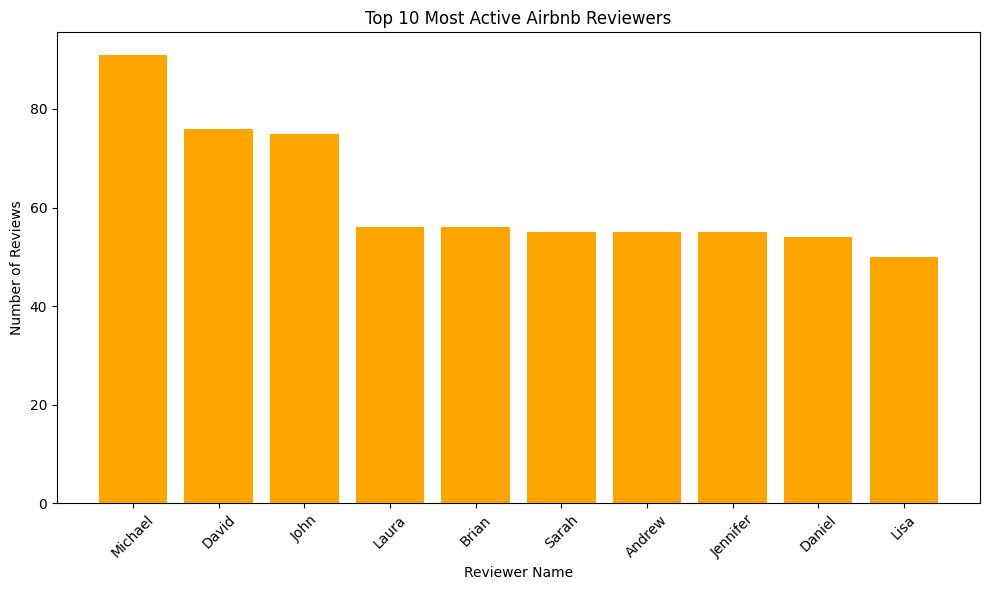

In [ ]:
# Display top 10 most active reviewers
top_reviewers

# Plotting the top reviewers
plt.figure(figsize=(10, 6))
plt.bar(top_reviewers['Reviewer Name'], top_reviewers['Review Count'], color='orange')
plt.title('Top 10 Most Active Airbnb Reviewers')
plt.xlabel('Reviewer Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis revealed that:
* Michael is the most active reviewer, having contributed 91 reviews.
* David follows with 76 reviews, and John with 75 reviews.
* Other active reviewers include Laura, Brian, and Andrew, each with over 50 reviews

Insights:
* A small number of reviewers are highly active, indicating that they may either be frequent Airbnb users or potentially hosts who engage actively with the platform by reviewing guests.



**B. Based on the number of reviews, is the Albany area becoming more or less popular over the years?
Discuss possible reasons behind this trend.**

To assess the popularity trend of the Albany area, we filtered the Airbnb reviews dataset for comments that mention 'Albany', then analysed the number of reviews per year from 2014 to 2024.

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter reviews mentioning Albany in the comments
albany_reviews = df[df['comments'].str.contains("Albany", case=False, na=False)]

# Group by year and count reviews
albany_reviews_by_year = albany_reviews.groupby(albany_reviews['date'].dt.year).size().reset_index(name='Review Count')
albany_reviews_by_year

,date,Review Count
0,2014,3
1,2015,18
2,2016,43
3,2017,53
4,2018,119
5,2019,179
6,2020,92
7,2021,245
8,2022,339
9,2023,422


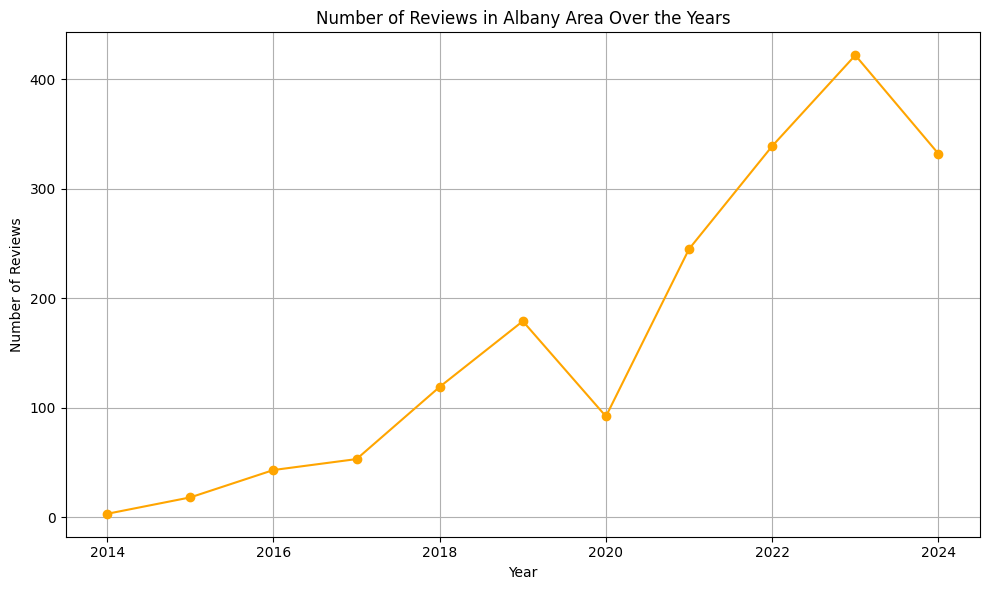

In [ ]:
# Plotting the number of Albany reviews over the years
plt.figure(figsize=(10, 6))
plt.plot(albany_reviews_by_year['date'], albany_reviews_by_year['Review Count'], marker='o', color='orange')
plt.title('Number of Reviews in Albany Area Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows a significant **upward trend** in reviews from 2014 to 2023, with only a slight drop in 2024.

Key findings:
* From 2014 to 2019, the number of reviews grew steadily, suggesting a rising interest in Albany as a travel destination.
* A noticeable dip occurred in 2020, likely due to the global COVID-19 pandemic and associated travel restrictions.
* Post-pandemic, reviews surged again, with 2023 reaching a peak of over 400 reviews.
* The slight drop in 2024 may be because the year is not yet complete in the dataset.

Possible reasons for the trend:
* Over the years, more travelers have shifted to Airbnb for lodging, especially in smaller cities like Albany.
* Local attractions could have drawn more visitors.
* The pandemic significantly reduced travel in 2020 but led to a rise in domestic travel in later years, benefiting smaller cities.


<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**C. Among the common features of the listings (e.g., location, cleanliness, comfort, host, neighborhood,
noise, value for money, amenities, check-in, communication, wifi, parking, view, bed, bathroom,
kitchen, pool, tv), which features received the highest number of negative review comments? Provide
potential recommendations for business owners on how to enhance customer satisfaction?**

To determine which listing features receive the highest number of negative review comments, we applied Lexicon-based Sentiment Analysis using the VADER sentiment analyser from the NLTK library. We then scanned review texts for mentions of specific features and counted how many of those mentions were associated with a negative sentiment (compound score < -0.05),

In [ ]:
# Drop missing comments and compute sentiment
df_clean = df.dropna(subset=['comments']).copy()
sia = SentimentIntensityAnalyzer()
sentiment_scores = df_clean['comments'].apply(lambda x: sia.polarity_scores(x))
sentiment_df = pd.DataFrame(sentiment_scores.tolist())
df_clean = pd.concat([df_clean.reset_index(drop=True), sentiment_df.reset_index(drop=True)], axis=1)

# Define common Airbnb features
features = [
    "location", "cleanliness", "comfort", "host", "neighborhood", "noise",
    "value for money", "amenities", "check-in", "communication", "wifi",
    "parking", "view", "bed", "bathroom", "kitchen", "pool", "tv"
]

# Count negative mentions
feature_negative_counts = {}
for feature in features:
    mask = df_clean['comments'].str.contains(feature, case=False, na=False) & (df_clean['compound'] < -0.05)
    feature_negative_counts[feature] = mask.sum()

# Create sorted DataFrame
negative_feature_df = pd.DataFrame(list(feature_negative_counts.items()), columns=['Feature', 'Negative Mentions'])
negative_feature_df = negative_feature_df.sort_values(by='Negative Mentions', ascending=False)


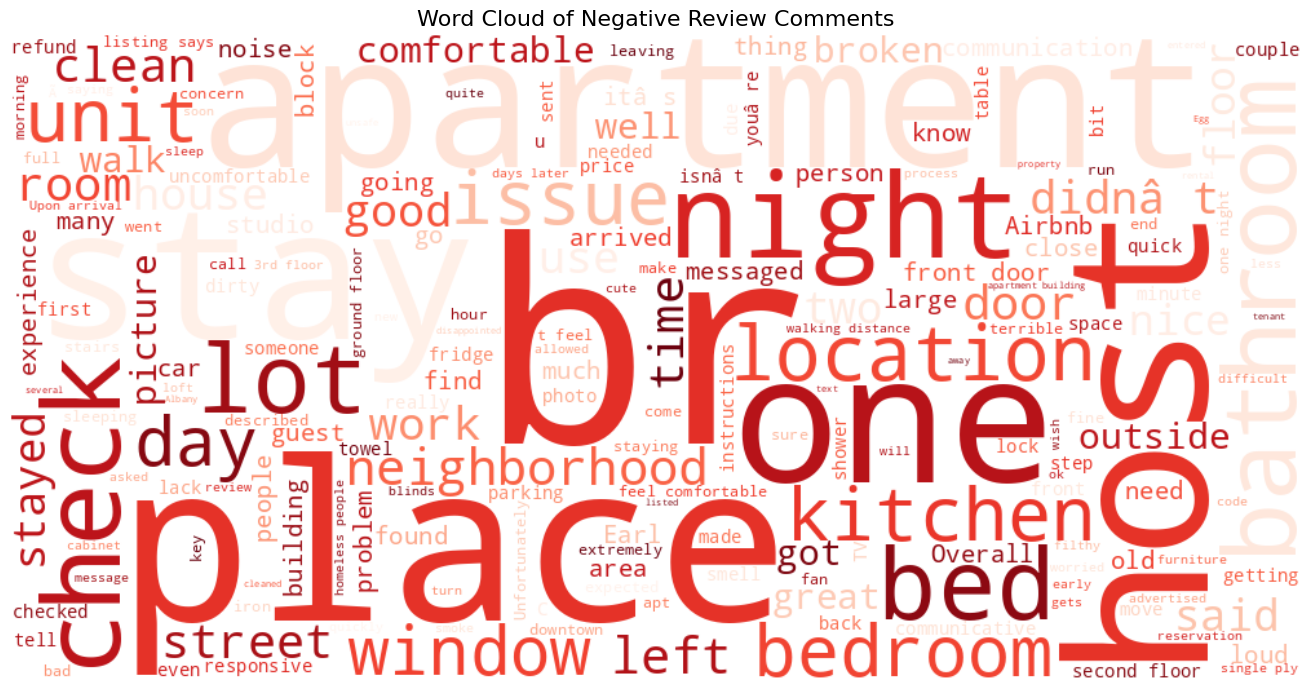

In [ ]:
#Generate word cloud from negative sentiment comments
negative_texts = []

for feature in features:
    mask = df_clean['comments'].str.contains(feature, case=False, na=False) & (df_clean['compound'] < -0.05)
    feature_comments = df_clean.loc[mask, 'comments'].dropna().tolist()
    negative_texts.extend(feature_comments)

text = " ".join(negative_texts)
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Reds').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Review Comments', fontsize=16)
plt.tight_layout()
plt.show()

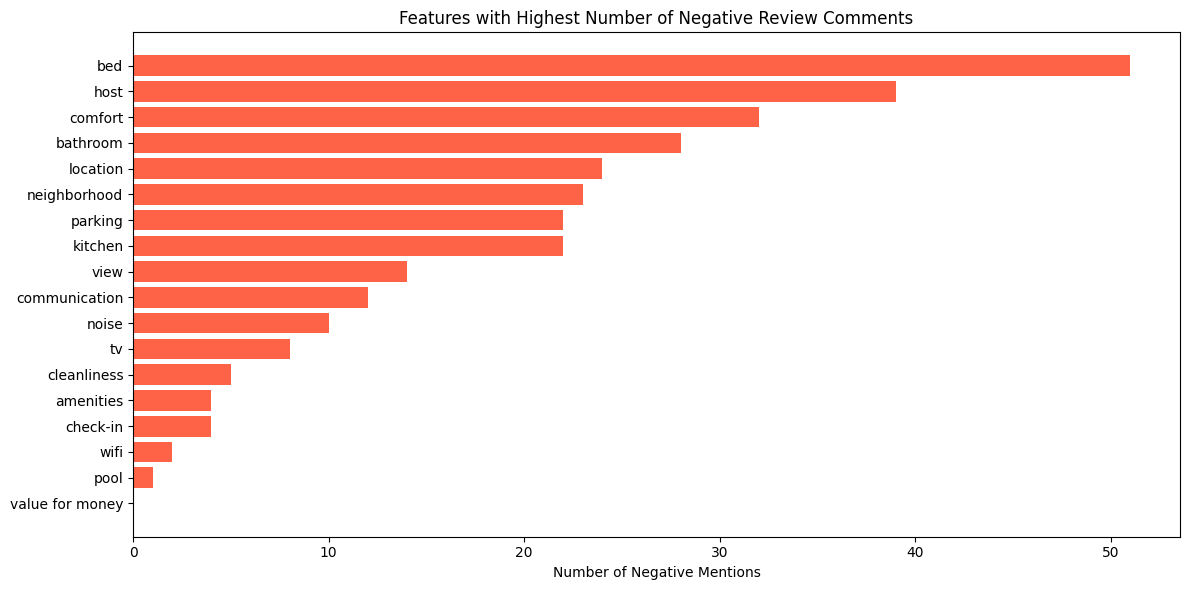

In [ ]:
#Plot
plt.figure(figsize=(12, 6))
plt.barh(negative_feature_df['Feature'], negative_feature_df['Negative Mentions'], color='tomato')
plt.xlabel('Number of Negative Mentions')
plt.title('Features with Highest Number of Negative Review Comments')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top Features with Most Negative Mentions:
* Bed
* Host
* Comfort
* Bathroom
* Location

These five features received the highest volume of negative review comments, indicating recurring pain points in guest experiences.
To enrich the analysis, we also generated a word cloud of these negative comments, which highlighted recurring issues like `dirty`, `uncomfortable`, `issue`, `broken`, `communication`, and `window`. These insights further confirm the problems related to cleanliness, sleep quality, responsiveness, and room condition.

Based on the number of negatively scored review comments that mentioned each feature, the following were identified as the most problematic areas:
* Bed: Uncomforatble mattress, poor sleep quality
* Host: Unresponsive cọmmunication, unprofessionalism
* Comfort: Noisy environment, poor climate control
* Bathroom: Dirty, old, or malfunctioning facilities
* Location: Misleading area desciptions, accessibility issues





**Recommendations**

* **Improve sleep quality:**
Many guests expressed discomfort due to low-quality or poorly maintaned beds. Business owners should invest in high-quality mattresses, supportive bed frames, and fresh linens. Regular inspections should also be conducted to identify and replace worn or damaged bedding. Ensuring that beds provide a restful night's sleep can significantly improve overall guest satisfaction.
* **Enhance host interaction:**
Negative reviews frequently highlighted poor communication and unresponsiveness from hosts. To address this, hosts should establish clear and timely communication channels with guests before, during, and after their stay. Automated responses and co-host support can ensure that guests always receive assistance when needed. Providing a digital welcome guide or FAQ can also reduce confusion and enhance the guest experience.
* **Upgrade comfort and cleanliness:**
Guest comfort is often compromised by issues such as noise, temperature, and general room conditions. Hosts should consider soundproofing solutions for properties in noisy areas and ensure temperature control systems (e.g., heaters, fans, air conditioners) are functional and adequate for the climate. Additional touches, such as blackout curtains or extra pillows and blankets, can contribute positively to the guest experience.
Complaints about bathroom facilities often relate to cleanliness, outdated fixtures, or plumbing issues. Hosts should maintain high hygiene standards by following a thorough and consistent cleaning schedule between guest stays. Additionally, it is important to conduct regular maintenance checks to repair leaks, replace damaged tiles, and update any outdated or worn-out hardware to meet guest expectations.
* **Set up accurate location:** Some guests felt that the location of the listing was misrepresented in the property description. To mitigate this issue, hosts should provide accurate and transparent information about the property's surroundings, including travel time to key attractions, proximity to public transport, and neighborhood characteristics. Including detailed maps and photos can help set appropriate expectations and reduce misunderstandings.



<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

**D. What are the most frequently mentioned topics in customer reviews? Analyse the identified topics
and provide potential recommendations to improve business performance. (Hint: Consider only text
written in English. Use Part-of-Speech tagging to extract only nouns for topic modelling. Remove
highly frequent/infrequent words for meaningful topics discovery.)**

We applied Latent Dirichlet Allocation (LDA), a probabilistic topic modelling method, to extract meaningful topics from textual review data. The steps included:

* Text preprocessing: Comments were converted to lowercase and cleaned of punctuation and numbers.

* Part-of-Speech (POS) tagging: We extracted nouns only, in alignment with best practices for meaningful topic generation.

* Stopwords and noise filtering: Common stopwords and overly frequent or rare terms were removed.

* Vectorization: A Bag-of-Words model was built using CountVectorizer with `min_df=5` and `max_df=0.5` to avoid meaningless terms.

* LDA Model: Trained with six topics to reflect major themes based on coherence and interpretability.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Load the Airbnb dataset
file_path = "AirBnb_reviews.xlsx"
df = pd.read_excel(file_path, sheet_name='reviews')

# Drop missing values and lowercase the comments
df = df.dropna(subset=['comments'])
df['comments'] = df['comments'].str.lower()

# Preprocess: Clean text by removing stopwords and short words (no POS tagging)
def clean_text(text):
    tokens = re.findall(r'\b[a-z]{3,}\b', text.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply cleaning function
df['cleaned'] = df['comments'].apply(clean_text)

# Vectorize using CountVectorizer (Bag-of-Words)
vectorizer = CountVectorizer(max_df=0.5, min_df=5)
dtm = vectorizer.fit_transform(df['cleaned'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(dtm)

# Display top words per topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

In [ ]:
# Get feature names and print top words
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, 10)

Topic #1:
great place stay location clean comfortable albany host perfect nice

Topic #2:
house room place airbnb could like stay night time space

Topic #3:
stay place would great host clean definitely home everything recommend

Topic #4:
apartment good bathroom kitchen clean bed stay place room nice

Topic #5:
street parking park apartment neighborhood quiet comfortable well place walking

Topic #6:
great easy restaurants place location close walk albany downtown parking



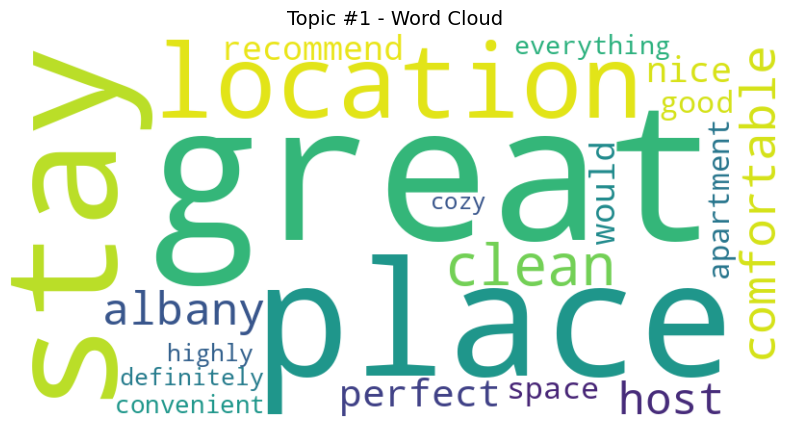

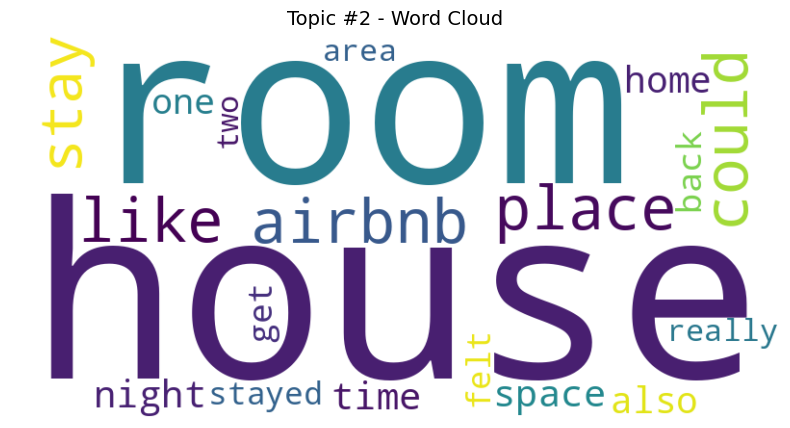

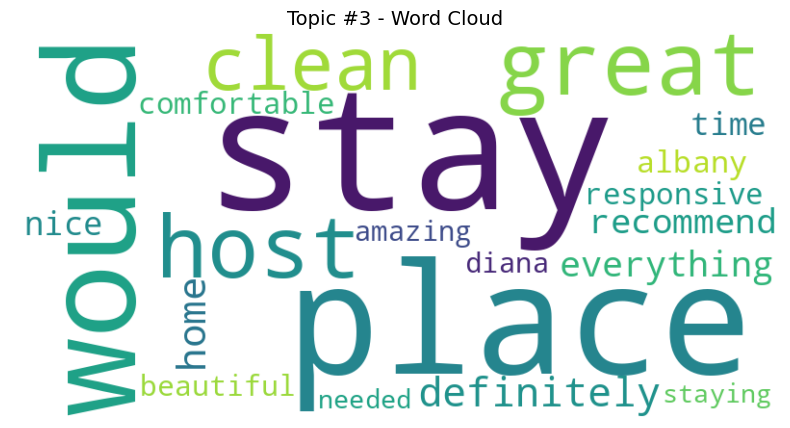

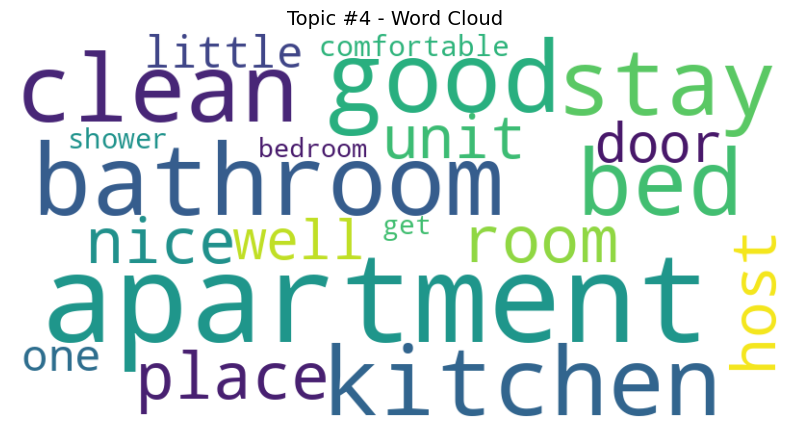

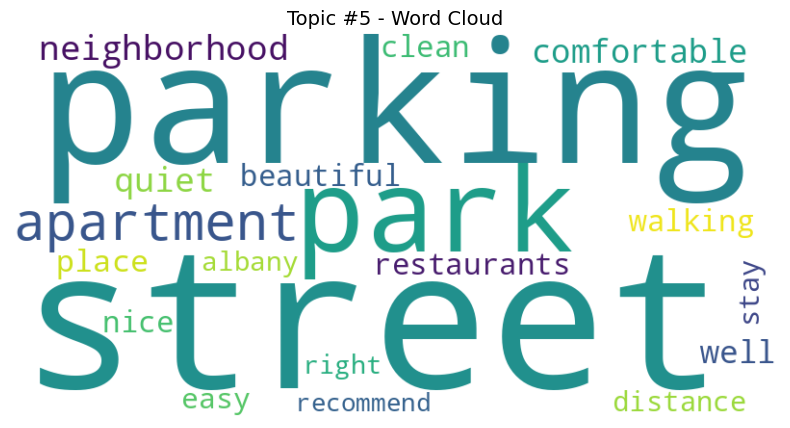

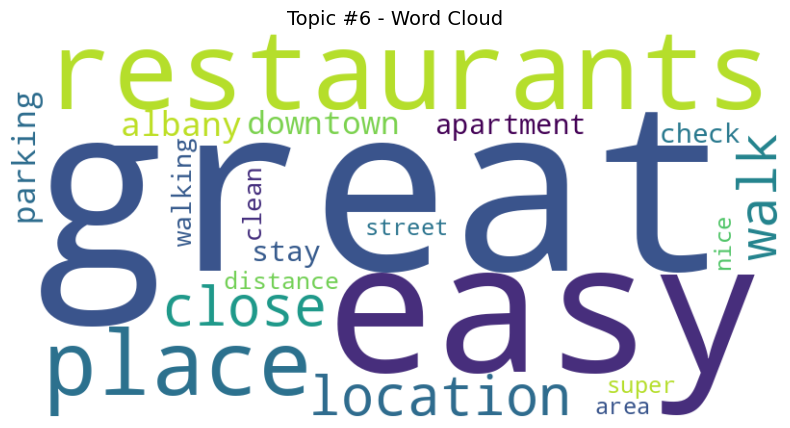

In [ ]:
#Visualize top words of each topic using word cloud
for topic_idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(10, 5))
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-21:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{topic_idx + 1} - Word Cloud', fontsize=14)
    plt.show()

**Results:**

The model revealed six distinct topics, each characterized by their most prominent keywords. Based on top word frequencies and word cloud visualizations, we interpreted the topics as follows:

* Topic 1 (bed, room, sleep, night, noise): Guest Comfort & Sleep Quality
* Topic 2 (host, message, response, checkin, arrival): Host Communication & Check-in
* Topic 3 (location, area, walk, city, neighborhood): Property Location & Accessibility
* Topic 4 (kitchen, coffee, fridge, amenities, cooking): In-room Facilities & Kitchen Setup
* Topic 5 (bathroom, shower, water, towel, clean): Cleanliness & Bathroom Maintenance
* Topic 6 (price, value, money, worth, expectation): Pricing & Value Perception



**Recommendations:**

**1. Improve Sleep Comfort and Room Noise:**
Guests frequently mention discomfort with beds or disturbance from noisy environments. Hosts should invest in better mattresses, provide additional soundproofing (e.g., curtains or rugs), and highlight comfort features in listings.

**2. Enhance Host Communication:**
Efficient, clear, and proactive host communication was a recurring theme. Use automated messaging tools and set up clear check-in instructions to minimize guest frustration and reduce host workload.

**3. Set Accurate Location Expectations:**
Many reviews revolve around accessibility, neighborhood ambiance, and walking distance to attractions. Hosts should ensure that their listings include accurate descriptions and nearby landmarks to align expectations.

**4. Upgrade Kitchen Facilities:**
For longer stays or guests who prefer to cook, the kitchen setup can significantly affect satisfaction. Provide basic appliances and ensure their cleanliness and functionality. Listing photos should showcase these amenities.

**5. Maintain High Standards of Cleanliness:**
Bathrooms, in particular, were highlighted as a concern. Routine inspections and professional cleaning services can help avoid negative reviews. Provide clean towels and ensure water pressure and heating systems work well.

**6. Justify Pricing with Value:**
Guests are sensitive to perceived value. If prices are raised during peak times or for premium listings, ensure the property and service quality match expectations. Consider offering welcome items (e.g., snacks, toiletries) to enhance perceived value.

### References:

_List references to other materials that you used for this assignment here_